# S&P 500 Data analysis

In [41]:
%matplotlib inline
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
import seaborn as sb  
sb.set_style('darkgrid')

In [42]:
stock_data = pd.read_csv('C:/Users/Christine Liou/Documents/1.Doc/Case study/Stock.csv')  

In [43]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/30/1927,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1/3/1928,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1/4/1928,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1/5/1928,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1/6/1928,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [44]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

In [45]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23346 entries, 0 to 23345
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23346 non-null  datetime64[ns]
 1   Open       23346 non-null  float64       
 2   High       23346 non-null  float64       
 3   Low        23346 non-null  float64       
 4   Close      23346 non-null  float64       
 5   Adj Close  23346 non-null  float64       
 6   Volume     23346 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.2 MB


In [18]:
stock_data = stock_data.set_index('Date')

In [46]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


<AxesSubplot:>

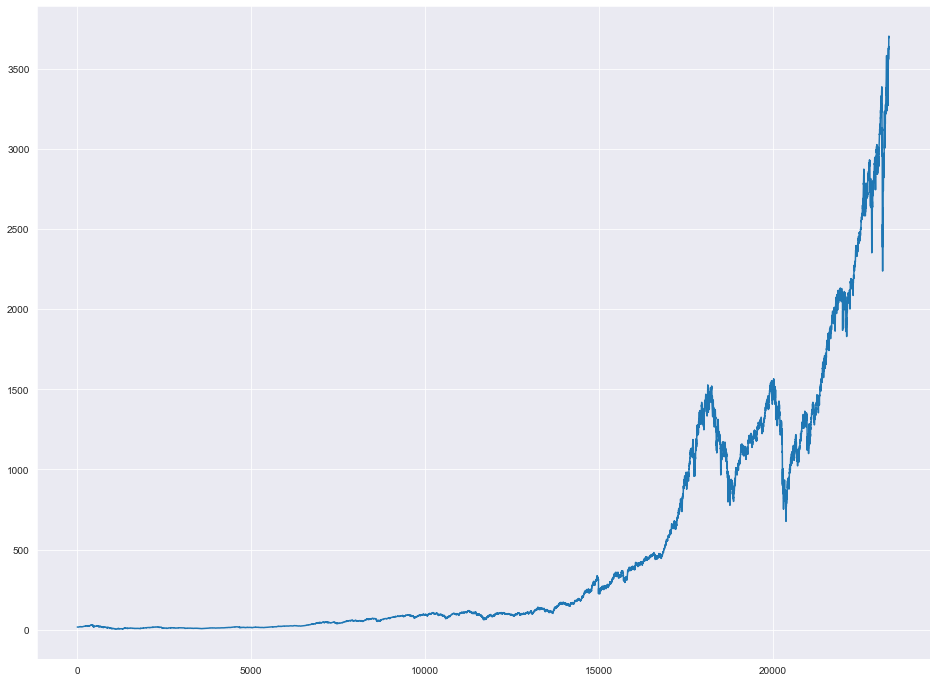

In [47]:
stock_data['Close'].plot(figsize=(16, 12))

In [48]:
zoom = stock_data[(stock_data.index > '1998-01-01') & (stock_data.index <= '2020-12-08')]

TypeError: Invalid comparison between dtype=int64 and str_

<AxesSubplot:xlabel='Date'>

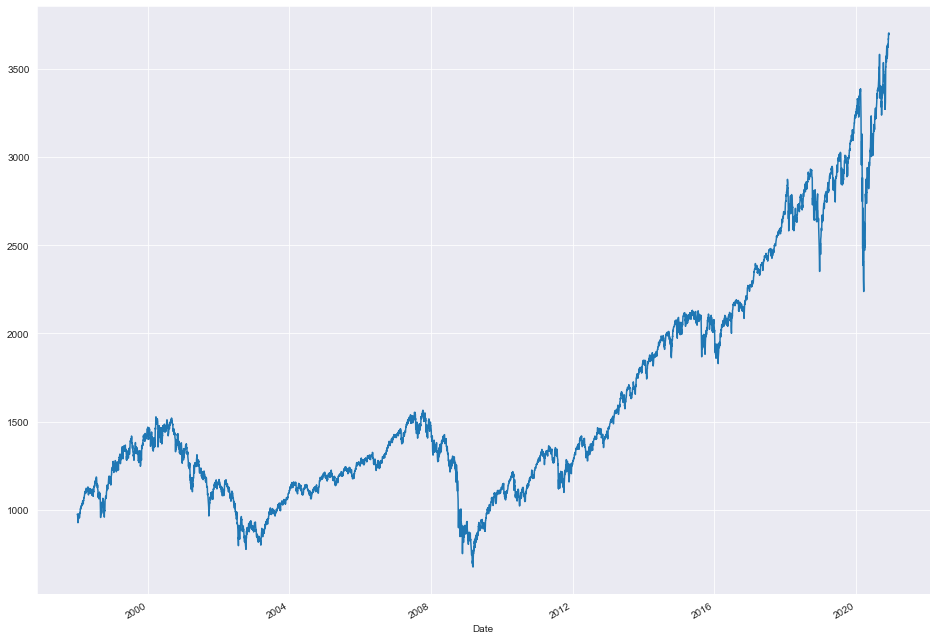

In [32]:
zoom['Close'].plot(figsize=(16, 12))

<AxesSubplot:>

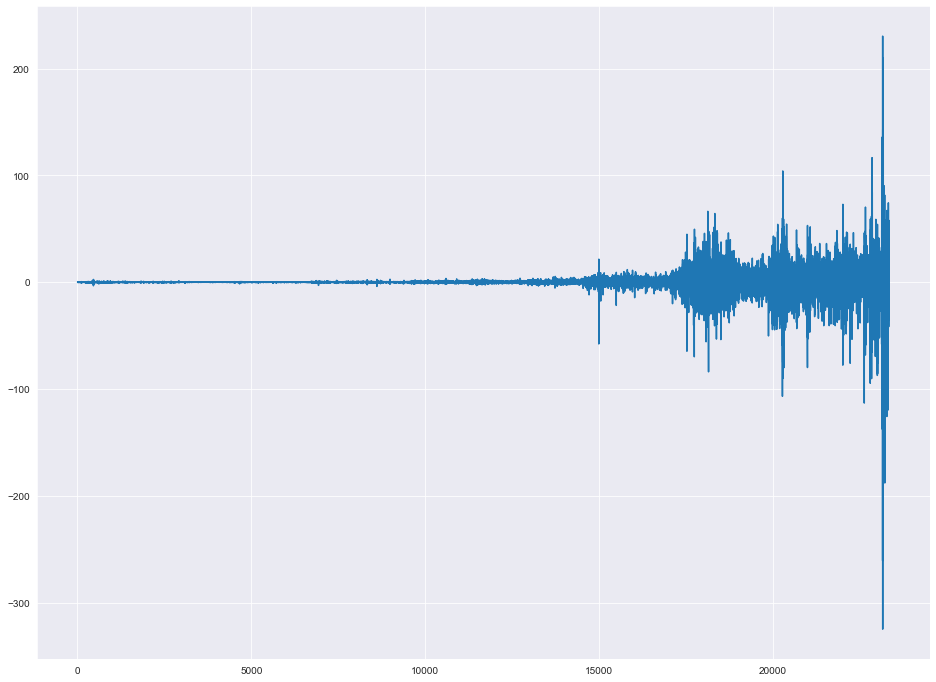

In [49]:
stock_data['First Difference'] = stock_data['Close'] - stock_data['Close'].shift()  
stock_data['First Difference'].plot(figsize=(16, 12))

<ipython-input-36-127998f9fd08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoom['First Difference'] = zoom['Close'] - zoom['Close'].shift()


<AxesSubplot:xlabel='Date'>

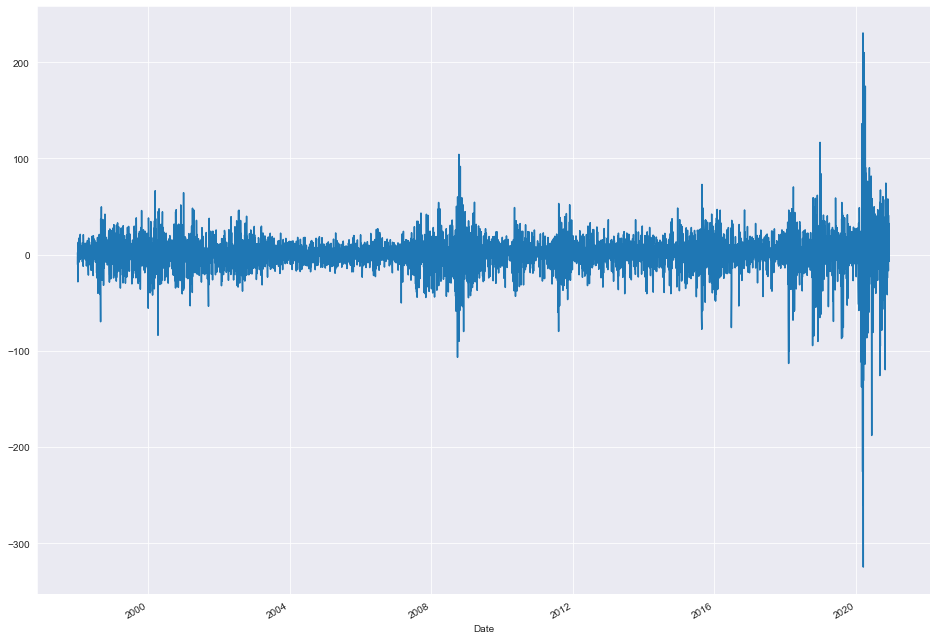

In [36]:
zoom['First Difference'] = zoom['Close'] - zoom['Close'].shift()  
zoom['First Difference'].plot(figsize=(16, 12))

<AxesSubplot:>

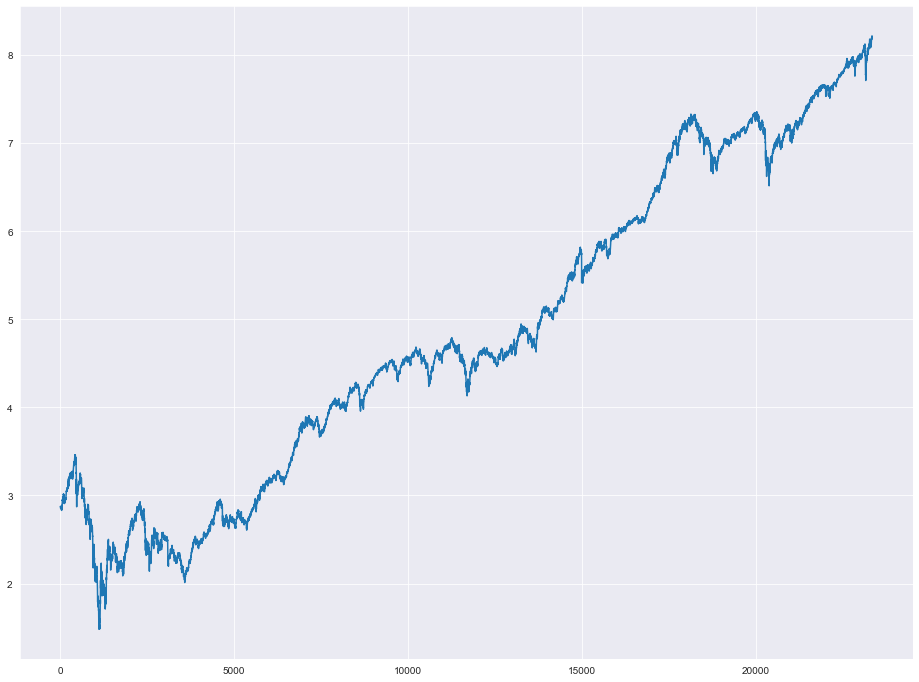

In [50]:
stock_data['Natural Log'] = stock_data['Close'].apply(lambda x: np.log(x))  
stock_data['Natural Log'].plot(figsize=(16, 12))

In [52]:
stock_data['Original Variance'] = pd.rolling_var(stock_data['Close'], 30, min_periods=None, freq=None, center=True)  


AttributeError: module 'pandas' has no attribute 'rolling_var'

#### Ref: https://medium.com/@jdwittenauer/a-simple-time-series-analysis-of-the-s-p-500-index-b12ffdb13cd6#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImQ0Y2JhMjVlNTYzNjYwYTkwMDlkODIwYTFjMDIwMjIwNzA1NzRlODIiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2MDc1MzczNjUsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExNTc4NjkzNTQ2OTI0OTc5OTUzOSIsImVtYWlsIjoiY2hyaXMubGlvdTAwN0BnbWFpbC5jb20iLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6IkNocmlzdGluZSBMaW91IiwicGljdHVyZSI6Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hLS9BT2gxNEdoSW5VMFJnc0lOcE5iUE5xQTJQTWpSM1pUWVQ0N0RGdzBNSlJiOWZRPXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6IkNocmlzdGluZSIsImZhbWlseV9uYW1lIjoiTGlvdSIsImlhdCI6MTYwNzUzNzY2NSwiZXhwIjoxNjA3NTQxMjY1LCJqdGkiOiJiM2FiZmVmNWZhNTQxYmJkNTIzZGI4OWQ5MTFkNTcwMzUwMmY4ZWVjIn0.qPYifosJqp3VKqNZhBD_KDeWQhjVXt85LAsj_boaAqKEC_0Boz8PVTmldEc9q_EcFnnbmN82LY9aRZ4-1u_pPQhViE-0BUM41LbiMwtoHlmaYt5SrY9h74OFs5dyb4OtbHPBH1o-ekYODNYTC3H3T7sIxU2_h7PzYuoXagaSt6-JSTUfzGUeZXkSmwN4VRGi1_caxqE900LN1twZ8r-mzYvRVEs9Dgiy0xXj4RGILahZCbm6AP8bxJhzzC1wTmD3o-_Uko-IiEfzV1u1y0zwMsHSPSPbyA5w-l1HRSuQ6xCwwhd3J07EAhOVF1w8jlUNgIe23bNwKqaLF0EnIGBJiA